In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#H='/Users/hongwang/Downloads/plot_uq_erescale/noise_noiserescale/uq_noise_rescale_noiserescalr/'

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
H='/content/drive/My Drive/galaxy_deblur/new_10k_data/'

In [58]:
!ls '/content/drive/My Drive/galaxy_deblur/new_10k_data/'

blur.png
deblur.png
dropout
e1-gaussian-high_scatter_tight.png
e1-gaussian-low_scatter_tight.png
e1-gaussian-medium_scatter_tight.png
e1-high_scatter.png
e1-high_scatter_tight.png
e1-l1-high_scatter_tight.png
e1-l1-low_scatter_tight.png
e1-l1-medium_scatter_tight.png
e1-low_scatter.png
e1-low_scatter_tight.png
e1-meanpsf-high_scatter.png
e1-meanpsf-high_scatter_tight.png
e1-meanpsf-low_scatter.png
e1-meanpsf-low_scatter_tight.png
e1-meanpsf-medium_scatter.png
e1-meanpsf-medium_scatter_tight.png
e1-medium_scatter.png
e1-medium_scatter_tight.png
e1_scatter.png
e1_scatter_tight.png
e2-gaussian-high_scatter_tight.png
e2-gaussian-low_scatter_tight.png
e2-gaussian-medium_scatter_tight.png
e2-high_scatter.png
e2-high_scatter_tight.png
e2-l1-high_scatter_tight.png
e2-l1-low_scatter_tight.png
e2-l1-medium_scatter_tight.png
e2-low_scatter.png
e2-low_scatter_tight.png
e2-meanpsf-high_scatter.png
e2-meanpsf-high_scatter_tight.png
e2-meanpsf-low_scatter.png
e2-meanpsf-low_scatter_tight.png
e2-meanp

In [59]:
#quadrature add
sadd = lambda x,y : np.sqrt(x**2+y**2)
def three_bins(q): # split quantity in three bins
    N=len(q)
    mlim1, mlim2 = np.sort(q)[[N//3, 2*N//3]]
    print(mlim1, mlim2)
    bin1 = np.where(q<=mlim1)
    bin2 = np.where((q>mlim1)&(q<=mlim2))
    bin3 = np.where((q>mlim2))
    return bin1,bin2,bin3

In [60]:
o = np.load(H+'result_correct/rebuttal/rebuttal_clamp_mean_220.npz')
#o = np.load(H+'new_data_meanpsf_clamp_channele.npz')
e1_pred = o['e1_deblur']
e2_pred = o['e2_deblur']
print(e1_pred.min(),e1_pred.max())
print(e2_pred.min(),e2_pred.max())
print((e1_pred<0).sum())

e1_true = o['e1_sharp']
e2_true = o['e2_sharp']
print(e1_true.min(), e1_true.max())
print(e2_true.min(), e2_true.max())
print((e1_true<0).sum())
mag = np.log10(o['M00_sharp'])

# let's make three mag bins.
mbin1, mbin2, mbin3 = three_bins(mag)

# PSF
#psf=np.load(H+"result_correct/new_data_meanpsf_kernel_clamp_channele.npz")
#psf=np.load(H+"new_data_meanpsf_kernel_clamp_channele.npz")
psf=np.load(H+"result_correct/rebuttal/rebuttal_clamp_kernel.npz")
psf_e1=psf['e1_kernel']
psf_e2=psf['e2_kernel']
psf_e = sadd(psf_e1,psf_e2)
#psf_e=psf['e_kernel_channel']
pbin1,pbin2,pbin3 = three_bins(psf_e)

-0.7120004892349243 0.7371601462364197
-0.7132060527801514 0.778938889503479
5249
-0.7699179649353027 0.8090218305587769
-0.7810567617416382 0.8256582617759705
5116
2.0684010947008256 2.743402861400131
0.09363447416357558 0.15605787026962173


In [61]:
o_clamp = np.load(H+'result_correct/rebuttal/rebuttal_clamp_full_230.npz')
mag_clamp = np.log10(o['M00_sharp'])
print(mag_clamp.min(), mag_clamp.max())
mbin1_clamp, mbin2_clamp, mbin3_clamp = three_bins(mag_clamp)

0.06623631200445897 4.004803422294271
2.0684010947008256 2.743402861400131


In [62]:
print(mag.min(), mag.max())

0.06623631200445897 4.004803422294271


In [63]:
o = np.load(H+'result_correct/rebuttal/rebuttal_clamp_full_230.npz')
e1_pred_orig = o['e1_sharp']
e2_pred_orig = o['e2_sharp']
print(e1_pred_orig.min(),e1_pred_orig.max())
print(e2_pred_orig.min(),e2_pred_orig.max())

o = np.load(H+'result_correct/rebuttal/rebuttal_clamp_l1_230.npz')
e1_pred_l1 = o['e1_sharp']
e2_pred_l1 = o['e2_sharp']
print(e1_pred_l1.min(),e1_pred_l1.max())
print(e2_pred_l1.min(),e2_pred_l1.max())

-0.7699179649353027 0.8090218305587769
-0.7810567617416382 0.8256582617759705
-0.7699179649353027 0.8090218305587769
-0.7810567617416382 0.8256582617759705


In [64]:
# o = np.load(H+'result_correct/new_data_gaussian_clamp_channele.npz')
o = np.load(H+'result_correct/rebuttal/rebuttal_clamp_gassian_230.npz')
e1_pred_gaussian = o['e1_sharp']
e2_pred_gaussian = o['e2_sharp']
print(e1_pred_gaussian.min(),e1_pred_gaussian.max())
print(e2_pred_gaussian.min(),e2_pred_gaussian.max())

-0.7699179649353027 0.8090218305587769
-0.7810567617416382 0.8256582617759705


Text(0, 0.5, 'Correlation')

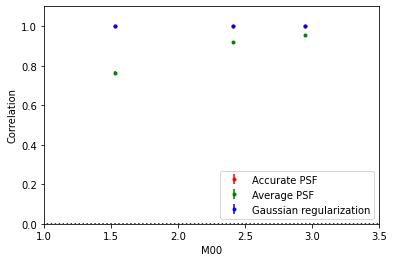

In [65]:
### let's do the same but split by magnitude
## see correlations between psf_e and true data, should be none
#q= (e1_pred*psf_e1+e2_pred*psf_e2)/psf_e
q_orig= (e1_pred_orig*e1_true+e2_pred_orig*e2_true)/(sadd(e1_pred_orig,e2_pred_orig)*sadd(e1_true,e2_true))
q_gaussian= (e1_pred_gaussian*e1_true+e2_pred_gaussian*e2_true)/(sadd(e1_pred_gaussian,e2_pred_gaussian)*sadd(e1_true,e2_true))
q= (e1_pred*e1_true+e2_pred*e2_true)/(sadd(e1_pred,e2_pred)*sadd(e1_true,e2_true))
#plt.plot(mag, q_orig,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
# and plot 3 bins
count=-1
for pbin in [mbin1,mbin2,mbin3]:
    count+=1
    line1=plt.errorbar(mag[pbin].mean(), q_orig[pbin].mean(),yerr=np.sqrt(q_orig[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    line2=plt.errorbar(mag[pbin].mean(), q[pbin].mean(),yerr=np.sqrt(q[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    line3=plt.errorbar(mag[pbin].mean(), q_gaussian[pbin].mean(),yerr=np.sqrt(q_gaussian[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    
plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.ylim(0, 1.1)
plt.xlim(1., 3.5)
#plt.legend()
plt.legend(handles=[line1, line2, line3], loc = 4)
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_true')

(3333,)


Text(0, 0.5, 'Correlation')

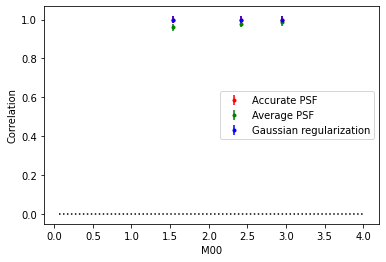

In [66]:
### let's do the same but split by magnitude
## see correlations between psf_e and true data, should be none
#q= (e1_pred*psf_e1+e2_pred*psf_e2)/psf_e
q_orig_t = (e1_pred_orig*e1_true+e2_pred_orig*e2_true)
q_orig_b =(sadd(e1_pred_orig,e2_pred_orig)*sadd(e1_true,e2_true))
q_gaussian_t = (e1_pred_gaussian*e1_true+e2_pred_gaussian*e2_true)
q_gaussian_b = (sadd(e1_pred_gaussian,e2_pred_gaussian)*sadd(e1_true,e2_true))
q_t = (e1_pred*e1_true+e2_pred*e2_true)
q_b = (sadd(e1_pred,e2_pred)*sadd(e1_true,e2_true))
print(q_orig_t[pbin].shape)
#plt.plot(mag, q_orig,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
# and plot 3 bins
count=-1
for pbin in [mbin1,mbin2,mbin3]:
    count+=1
    line1=plt.errorbar(mag[pbin].mean(), q_orig_t[pbin].mean()/q_orig_b[pbin].mean(),yerr=np.sqrt(q_orig_t[pbin].var()/q_orig_b[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    line2=plt.errorbar(mag[pbin].mean(), q_t[pbin].mean()/q_b[pbin].mean(),yerr=np.sqrt(q_t[pbin].var()/q_b[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    line3=plt.errorbar(mag[pbin].mean(), q_gaussian_t[pbin].mean()/q_gaussian_b[pbin].mean(),yerr=np.sqrt(q_gaussian_t[pbin].var()/q_gaussian_b[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    
plt.plot([mag.min(),mag.max()],[0,0],'k:')
#plt.ylim(0, 1.1)
#plt.xlim(mag.min(), 2.5)
#plt.legend()
plt.legend(handles=[line1, line2, line3])
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_true_topbottom')

(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)


Text(0, 0.5, 'Correlation')

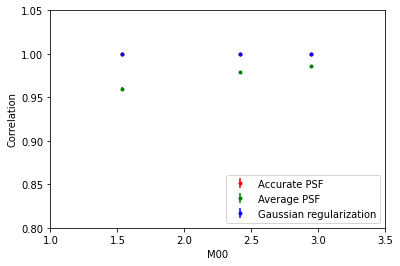

In [67]:
### let's do the same but split by magnitude
## see correlations between psf_e and true data, should be none
#q= (e1_pred*psf_e1+e2_pred*psf_e2)/psf_e
q_orig_t = (e1_pred_orig*e1_true+e2_pred_orig*e2_true)
q_orig_b =(sadd(e1_pred_orig,e2_pred_orig)*sadd(e1_true,e2_true))
q_gaussian_t = (e1_pred_gaussian*e1_true+e2_pred_gaussian*e2_true)
q_gaussian_b = (sadd(e1_pred_gaussian,e2_pred_gaussian)*sadd(e1_true,e2_true))
q_t = (e1_pred*e1_true+e2_pred*e2_true)
q_b = (sadd(e1_pred,e2_pred)*sadd(e1_true,e2_true))
#print(q_orig_t[pbin].shape)
#plt.plot(mag, q_orig,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
# and plot 3 bins
count=-1
split = 10
for pbin in [mbin1,mbin2,mbin3]:
    q_orig= []
    q = []
    q_gaussian = []
    seg = len(pbin[0])//split
    for i in range(split):
      if i==split-1:
        q_orig.append(q_orig_t[pbin][i*seg:].mean()/q_orig_b[pbin][i*seg:].mean())
        q.append(q_t[pbin][i*seg:].mean()/q_b[pbin][i*seg:].mean())
        q_gaussian.append(q_gaussian_t[pbin][i*seg:].mean()/q_gaussian_b[pbin][i*seg:].mean())

      else:
        q_orig.append(q_orig_t[pbin][i*seg:(i+1)*seg].mean()/q_orig_b[pbin][i*seg:(i+1)*seg].mean())
        q.append(q_t[pbin][i*seg:(i+1)*seg].mean()/q_b[pbin][i*seg:(i+1)*seg].mean())
        q_gaussian.append(q_gaussian_t[pbin][i*seg:(i+1)*seg].mean()/q_gaussian_b[pbin][i*seg:(i+1)*seg].mean())

    q_orig = np.array(q_orig)
    q = np.array(q)
    q_gaussian = np.array(q_gaussian)
    print(q_orig.shape)
    print(q.shape)
    print(q_gaussian.shape)
    # p1=plt.errorbar(mag[pbin].mean(), q_orig_t[pbin].mean()/q_orig_b[pbin].mean(),yerr=np.sqrt(q_orig_t[pbin].var()/q_orig_b[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    # p2=plt.errorbar(mag[pbin].mean(), q_t[pbin].mean()/q_b[pbin].mean(),yerr=np.sqrt(q_t[pbin].var()/q_b[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    # p3=plt.errorbar(mag[pbin].mean(), q_gaussian_t[pbin].mean()/q_gaussian_b[pbin].mean(),yerr=np.sqrt(q_gaussian_t[pbin].var()/q_gaussian_b[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    
    line1=plt.errorbar(mag[pbin].mean(), q_orig.mean(),yerr=np.sqrt(q_orig.var()/split),fmt='r.', label='Accurate PSF')
    line2=plt.errorbar(mag[pbin].mean(), q.mean(),yerr=np.sqrt(q.var()/split),fmt='g.', label='Average PSF')
    line3=plt.errorbar(mag[pbin].mean(), q_gaussian.mean(),yerr=np.sqrt(q_gaussian.var()/split),fmt='b.', label='Gaussian regularization')

    count+=1
    
plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.ylim(0.8, 1.05)
plt.xlim(1.0, 3.5)
#plt.legend()
plt.legend(handles=[line1, line2, line3], loc=4)
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_true_split10', bbox_inches = 'tight')

-0.005235146630050852
0.0008115618060560416
-0.004866502895717701


Text(0, 0.5, 'Correlation')

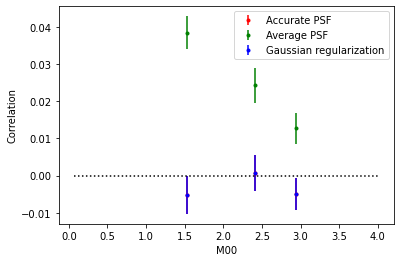

In [68]:
q_orig= (e1_pred_orig*psf_e1+e2_pred_orig*psf_e2)/psf_e
q_gaussian= (e1_pred_gaussian*psf_e1+e2_pred_gaussian*psf_e2)/psf_e
q= (e1_pred*psf_e1+e2_pred*psf_e2)/psf_e
#plt.plot(mag, q,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
# and plot 3 bins
for pbin in [mbin1,mbin2,mbin3]:
    p1=plt.errorbar(mag[pbin].mean(), q_orig[pbin].mean(),yerr=np.sqrt(q_orig[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    p2=plt.errorbar(mag[pbin].mean(), q[pbin].mean(),yerr=np.sqrt(q[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    p3=plt.errorbar(mag[pbin].mean(), q_gaussian[pbin].mean(),yerr=np.sqrt(q_gaussian[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    print(q_gaussian[pbin].mean())
plt.plot([mag.min(),mag.max()],[0,0],'k:')
#plt.xlim(mag.min(), 2.5)
#plt.plot([0.5,mag.max()],[0,0],'k:')
#plt.xlim(0.5, 2.5)
plt.legend(handles=[p1, p2, p3])#, loc=2)
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_psf')


-0.005235146630050852
0.0008115618060560416
-0.004866502895717701


Text(0, 0.5, 'Correlation')

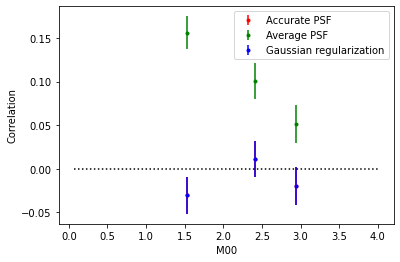

In [69]:
q_orig_t = (e1_pred_orig*psf_e1+e2_pred_orig*psf_e2)
q_orig_b = psf_e*sadd(e1_pred_orig,e2_pred_orig)
q_gaussian_t = (e1_pred_gaussian*psf_e1+e2_pred_gaussian*psf_e2)
q_gaussian_b = psf_e*sadd(e1_pred_gaussian,e2_pred_gaussian)
q_t = (e1_pred*psf_e1+e2_pred*psf_e2)
q_b = psf_e*sadd(e1_pred,e2_pred)
#plt.plot(mag, q,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
# and plot 3 bins
for pbin in [mbin1,mbin2,mbin3]:
    p1=plt.errorbar(mag[pbin].mean(), q_orig_t[pbin].mean()/q_orig_b[pbin].mean(),yerr=np.sqrt(q_orig_t[pbin].var()/q_orig_b[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    p2=plt.errorbar(mag[pbin].mean(), q_t[pbin].mean()/q_b[pbin].mean(),yerr=np.sqrt(q_t[pbin].var()/q_b[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    p3=plt.errorbar(mag[pbin].mean(), q_gaussian_t[pbin].mean()/q_gaussian_b[pbin].mean(),yerr=np.sqrt(q_gaussian_t[pbin].var()/q_gaussian_b[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    
    # p1=plt.errorbar(mag[pbin].mean(), q_orig[pbin].mean(),yerr=np.sqrt(q_orig[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    # p2=plt.errorbar(mag[pbin].mean(), q[pbin].mean(),yerr=np.sqrt(q[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    # p3=plt.errorbar(mag[pbin].mean(), q_gaussian[pbin].mean(),yerr=np.sqrt(q_gaussian[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    print(q_gaussian[pbin].mean())
plt.plot([mag.min(),mag.max()],[0,0],'k:')
#plt.xlim(mag.min(), 2.5)
#plt.plot([0.5,mag.max()],[0,0],'k:')
#plt.xlim(0.5, 2.5)
plt.legend(handles=[p1, p2, p3])#, loc=2)
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_psf_topbottom')

Text(0, 0.5, 'Correlation')

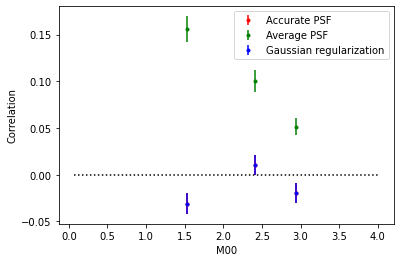

In [ ]:
q_orig_t = (e1_pred_orig*psf_e1+e2_pred_orig*psf_e2)
q_orig_b = psf_e*sadd(e1_pred_orig,e2_pred_orig)
q_gaussian_t = (e1_pred_gaussian*psf_e1+e2_pred_gaussian*psf_e2)
q_gaussian_b = psf_e*sadd(e1_pred_gaussian,e2_pred_gaussian)
q_t = (e1_pred*psf_e1+e2_pred*psf_e2)
q_b = psf_e*sadd(e1_pred,e2_pred)
#plt.plot(mag, q,'b.')
#plt.plot([mag.min(),mag.max()],[0,0],'k:')
plt.figure()
split = 10
# and plot 3 bins
for pbin in [mbin1,mbin2,mbin3]:
    q_orig= []
    q = []
    q_gaussian = []
    seg = len(pbin[0])//split
    for i in range(split):
      if i==split-1:
        q_orig.append(q_orig_t[pbin][i*seg:].mean()/q_orig_b[pbin][i*seg:].mean())
        q.append(q_t[pbin][i*seg:].mean()/q_b[pbin][i*seg:].mean())
        q_gaussian.append(q_gaussian_t[pbin][i*seg:].mean()/q_gaussian_b[pbin][i*seg:].mean())

      else:
        q_orig.append(q_orig_t[pbin][i*seg:(i+1)*seg].mean()/q_orig_b[pbin][i*seg:(i+1)*seg].mean())
        q.append(q_t[pbin][i*seg:(i+1)*seg].mean()/q_b[pbin][i*seg:(i+1)*seg].mean())
        q_gaussian.append(q_gaussian_t[pbin][i*seg:(i+1)*seg].mean()/q_gaussian_b[pbin][i*seg:(i+1)*seg].mean())

    q_orig = np.array(q_orig)
    q = np.array(q)
    q_gaussian = np.array(q_gaussian)
    
    # p1=plt.errorbar(mag[pbin].mean(), q_orig_t[pbin].mean()/q_orig_b[pbin].mean(),yerr=np.sqrt(q_orig_t[pbin].var()/q_orig_b[pbin].var()/len(pbin[0])),fmt='r.', label='Accurate PSF')
    # p2=plt.errorbar(mag[pbin].mean(), q_t[pbin].mean()/q_b[pbin].mean(),yerr=np.sqrt(q_t[pbin].var()/q_b[pbin].var()/len(pbin[0])),fmt='g.', label='Average PSF')
    # p3=plt.errorbar(mag[pbin].mean(), q_gaussian_t[pbin].mean()/q_gaussian_b[pbin].mean(),yerr=np.sqrt(q_gaussian_t[pbin].var()/q_gaussian_b[pbin].var()/len(pbin[0])),fmt='b.', label='Gaussian regularization')
    
    p1=plt.errorbar(mag[pbin].mean(), q_orig.mean(),yerr=np.sqrt(q_orig.var()/split),fmt='r.', label='Accurate PSF')
    p2=plt.errorbar(mag[pbin].mean(), q.mean(),yerr=np.sqrt(q.var()/split),fmt='g.', label='Average PSF')
    p3=plt.errorbar(mag[pbin].mean(), q_gaussian.mean(),yerr=np.sqrt(q_gaussian.var()/split),fmt='b.', label='Gaussian regularization')
    #print(q_gaussian[pbin].mean())
plt.plot([mag.min(),mag.max()],[0,0],'k:')
#plt.xlim(mag.min(), 2.5)
#plt.plot([0.5,mag.max()],[0,0],'k:')
#plt.xlim(0.5, 2.5)
plt.legend(handles=[p1, p2, p3])#, loc=2)
plt.xlabel('M00')
plt.ylabel('Correlation')
#plt.savefig(H+'pred_psf_split10', bbox_inches = 'tight')